In [9]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


Problem Statement:
Create a subplot with 2 rows and 1 column:

In the first subplot, plot a bar chart of the top 3 job locations by the number of job postings.
In the second subplot, plot a horizontal bar chart of the top 3 job titles by the number of job postings.
Use tight_layout() to adjust the spacing between subplots.
Hint:
Use plt.subplots() to create the subplots and fig.tight_layout() to adjust the spacing.

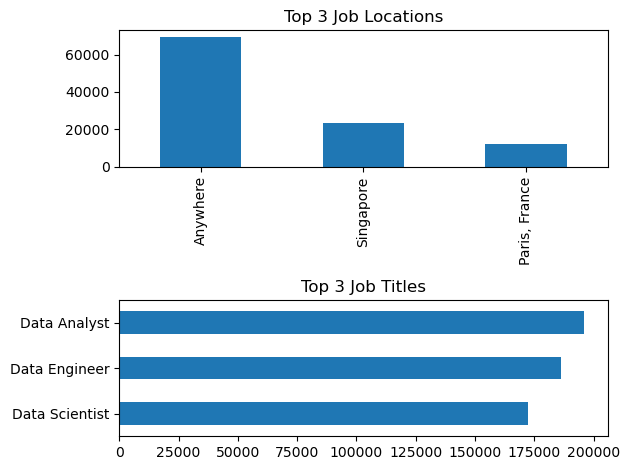

In [21]:
fig, ax = plt.subplots(2, 1)

df['job_location'].value_counts().head(3).plot(kind='bar', ax=ax[0])
df['job_title_short'].value_counts().head(3).plot(kind='barh', ax=ax[1])

ax[0].set_title('Top 3 Job Locations')
ax[0].set_xlabel('')
ax[1].set_title('Top 3 Job Titles')
ax[1].set_ylabel('')
ax[1].invert_yaxis()


fig.tight_layout()


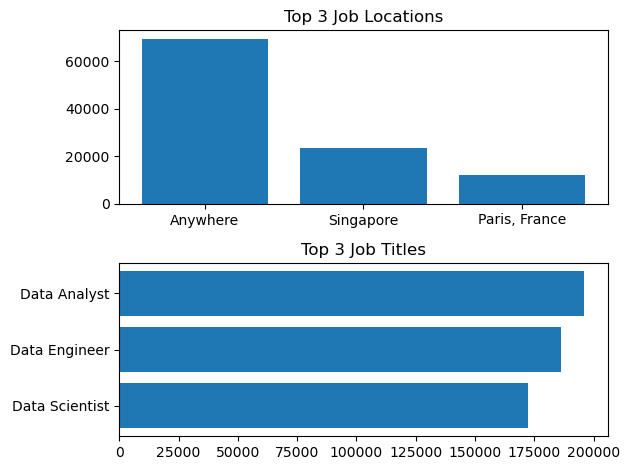

In [ ]:
fig, ax = plt.subplots(2, 1)

# Top 3 job locations
job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

# Top 3 job titles
job_titles = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_titles.index, job_titles.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()
plt.show()

Problem Statement:
Create a subplot with 2 rows and 2 columns:

In each subplot, plot a bar chart of the top 3 job titles by the number of job postings for each job schedule type (Full-time, Part-time, Contractor, and Internship).
Use fig.tight_layout() to adjust the spacing between subplots.

Hint:
Use plt.subplots() to create the subplots and fig.tight_layout() to adjust the spacing. Filter the DataFrame for each job schedule type before plotting.

In [22]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

In [71]:
jobs_schedule = df[df['job_schedule_type'] == 'Full-time']


job_counts = jobs_schedule.groupby('job_title_short')['job_schedule_type'].count().sort_values(ascending=False).head(3)
    
#job_counts = jobs_schedule['job_title_short'].value_counts().head(3)
job_counts


job_title_short
Data Analyst      168975
Data Engineer     165225
Data Scientist    153278
Name: job_schedule_type, dtype: int64

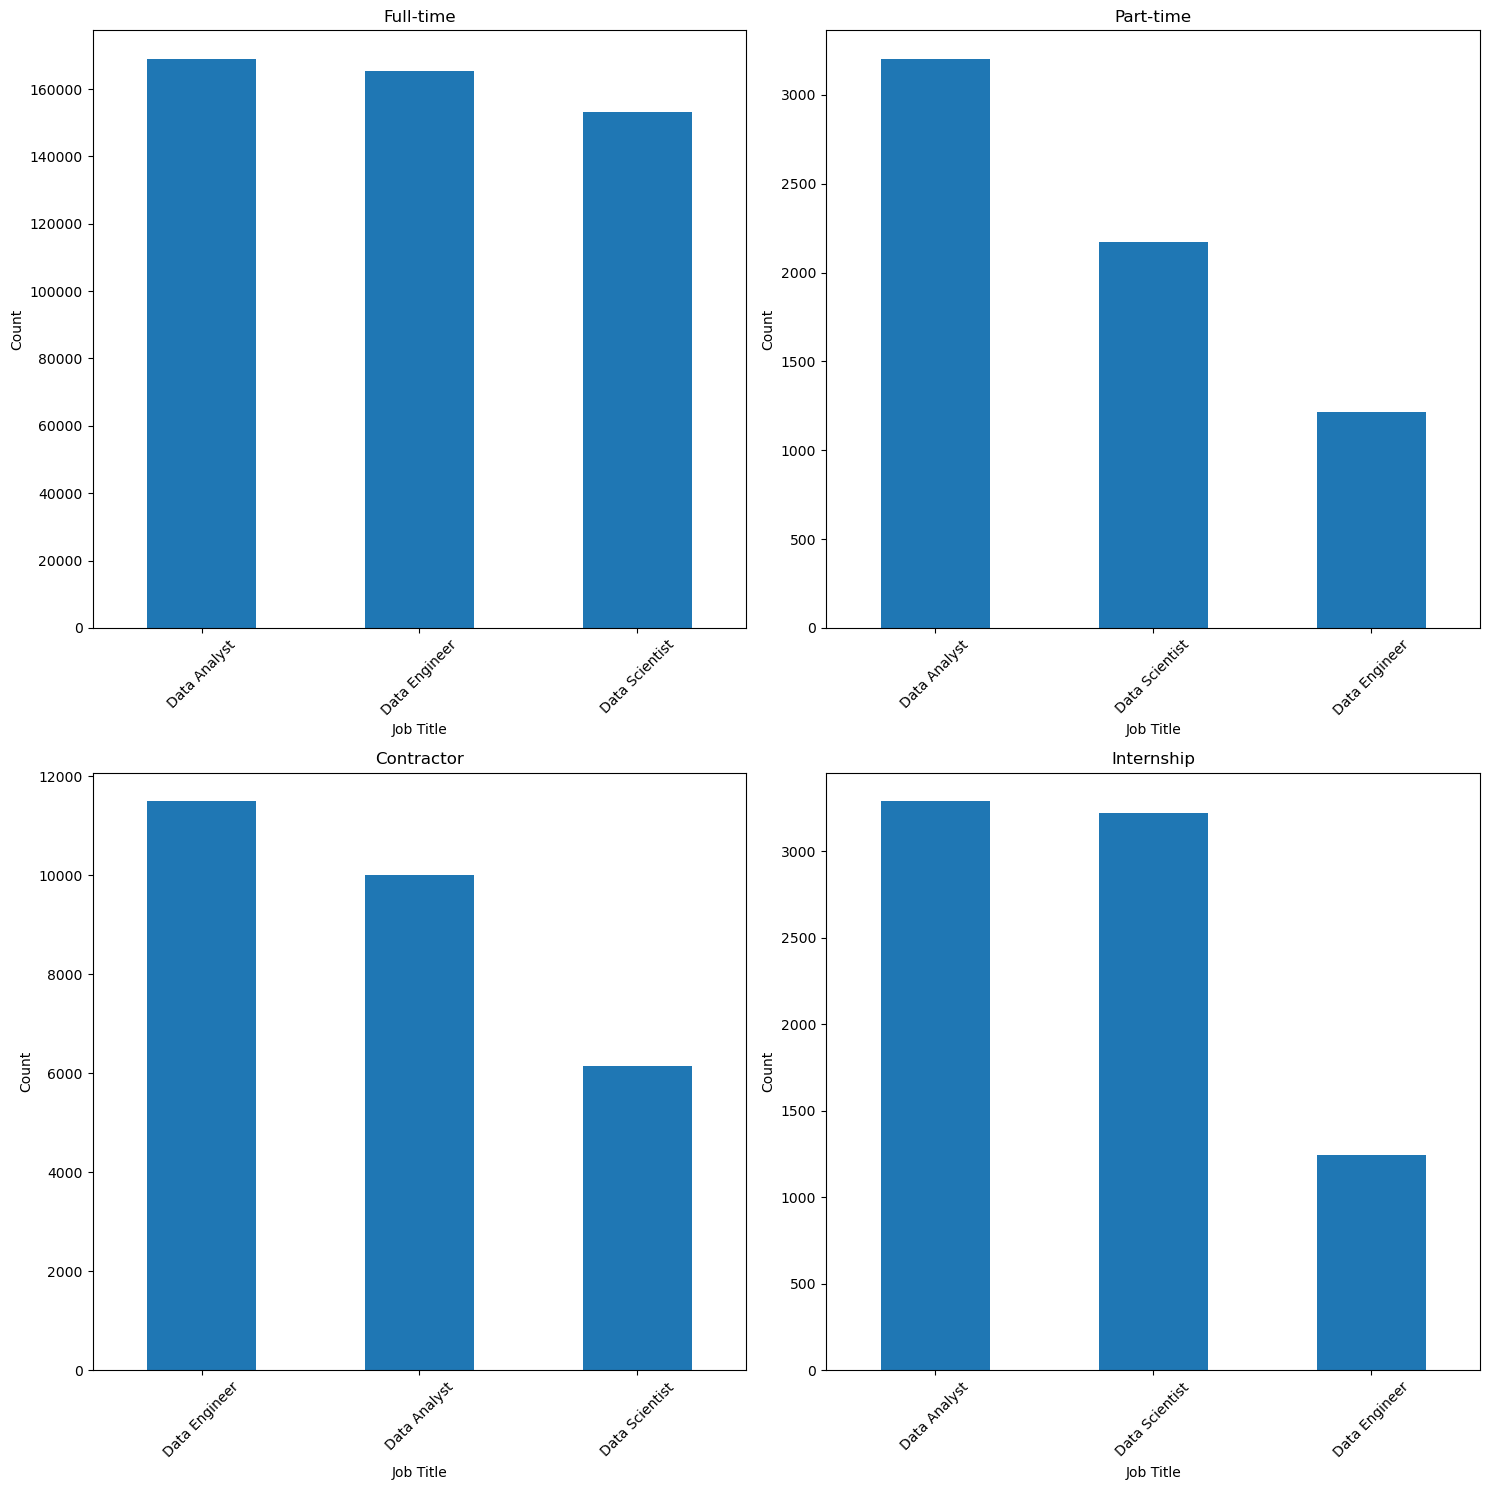

In [72]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

ax = ax.flatten()

for num, schedule in enumerate(schedules):

    jobs_schedule = df[df['job_schedule_type'] == schedule]
    job_counts = jobs_schedule['job_title_short'].value_counts().head(3)
    #job_count = jobs_schedule.groupby('job_title_short')['job_schedule_type'].count().sort_values(ascending=False).head(3)
    job_counts.plot(kind='bar', ax=ax[num])
    ax[num].tick_params(axis='x', labelrotation=45)
    ax[num].set_title(schedule)
    ax[num].set_xlabel('Job Title')
    ax[num].set_ylabel('Count')

fig.tight_layout()
    


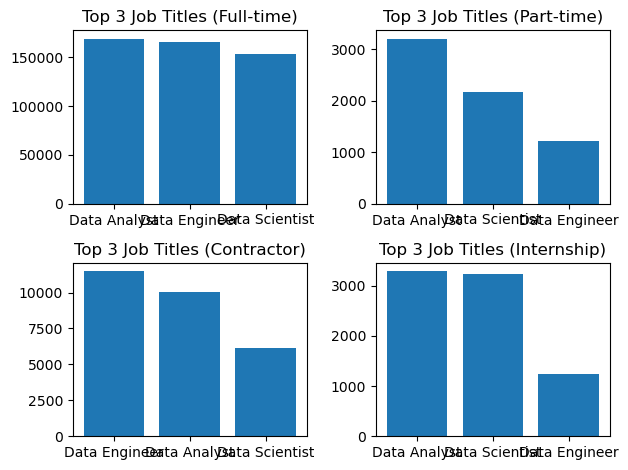

In [66]:
fig, ax = plt.subplots(2, 2)

# Job schedule types
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()

Problem Statement:
Create a subplot with 3 rows and 1 column:

In each subplot, plot a horizontal bar chart of the top 3 job skills by the number of job postings for each job title (Senior Data Scientist, Senior Data Engineer, and Senior Data Analyst).
Use fig.tight_layout() to adjust the spacing between subplots and invert_yaxis() to invert the y-axis in each subplot.

Hint:
Use the plt.subplots() function to create subplots and fig.tight_layout() to prevent overlap.

In [ ]:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

In [79]:
df_roles = df[df['job_title_short'] == 'Senior Data Analyst']
df_exploded = df_roles.explode('job_skills')
role_counts = df_exploded['job_skills'].value_counts().head(3)
role_counts

job_skills
sql        17709
python     11051
tableau     9989
Name: count, dtype: int64

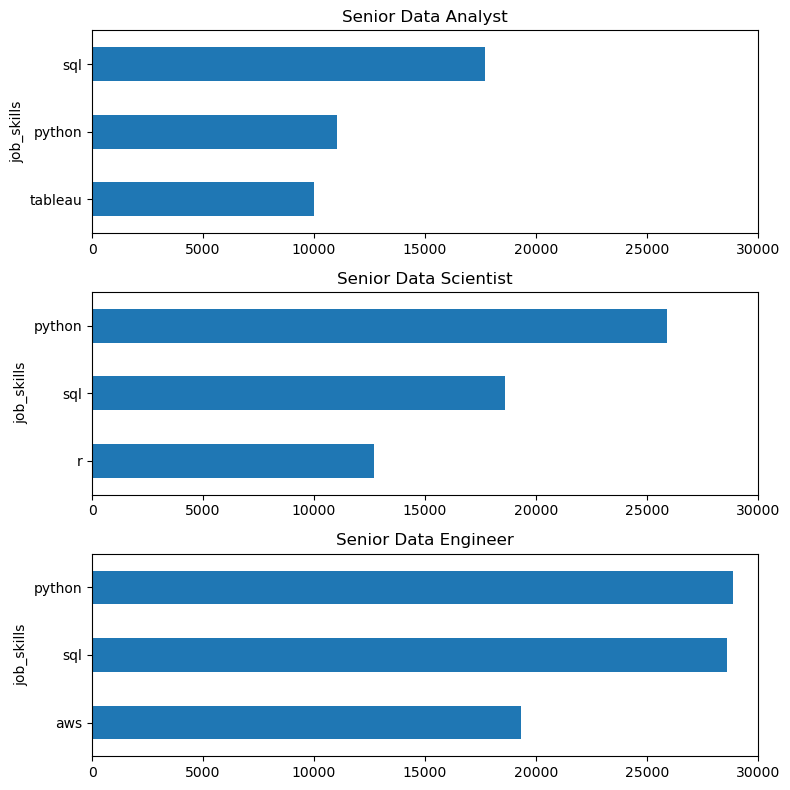

In [96]:
fig, ax = plt.subplots(3, 1, figsize=(8,8))
#df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

ax = ax.flatten()

for num, role in enumerate(job_roles):

    df_roles = df[df['job_title_short'] == role]
    df_exploded = df_roles.explode('job_skills')
    role_counts = df_exploded['job_skills'].value_counts().head(3)
    role_counts.plot(kind='barh', ax=ax[num])
    ax[num].set_title(role)
    ax[num].invert_yaxis()
    ax[num].set_xlim(0, 30000)

fig.tight_layout()


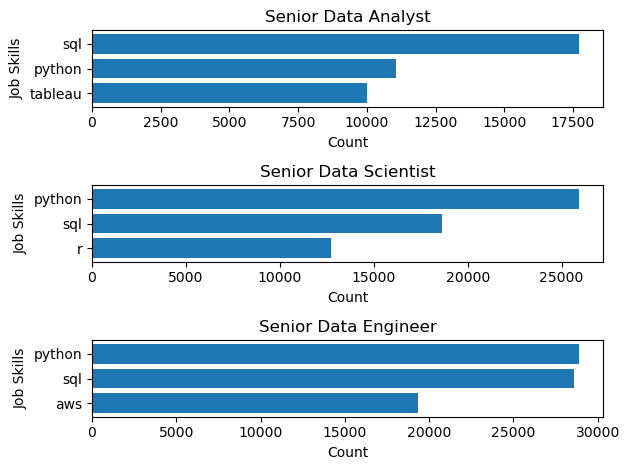

In [95]:
df_skills = df.explode('job_skills')
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
fig, ax = plt.subplots(len(job_roles), 1)
for i, role in enumerate(job_roles):
    role_skills = df_skills[df_skills['job_title_short'] == role]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(role)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()
fig.tight_layout()
plt.show()